<a href="https://colab.research.google.com/github/sakasa/notebooks/blob/master/seaborn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://seaborn.pydata.org/index.html
- https://note.com/hiro10_yme38/n/nd2fa525942f3#DbQOL

In [1]:
!python -V
!pip -V

Python 3.7.11
pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


In [2]:
import seaborn as sns
sns.__version__

'0.11.1'

In [3]:
import numpy as np
np.__version__

'1.19.5'

In [4]:
import pandas as pd
pd.__version__

'1.1.5'

In [5]:
import matplotlib
matplotlib.__version__

'3.2.2'

In [6]:
import matplotlib.pyplot as plt

In [7]:
import requests
# import json
import matplotlib.dates as mdates
from matplotlib import ticker
import datetime
import time
# import re
# from pytz import timezone
from tqdm.notebook import tqdm

%matplotlib inline

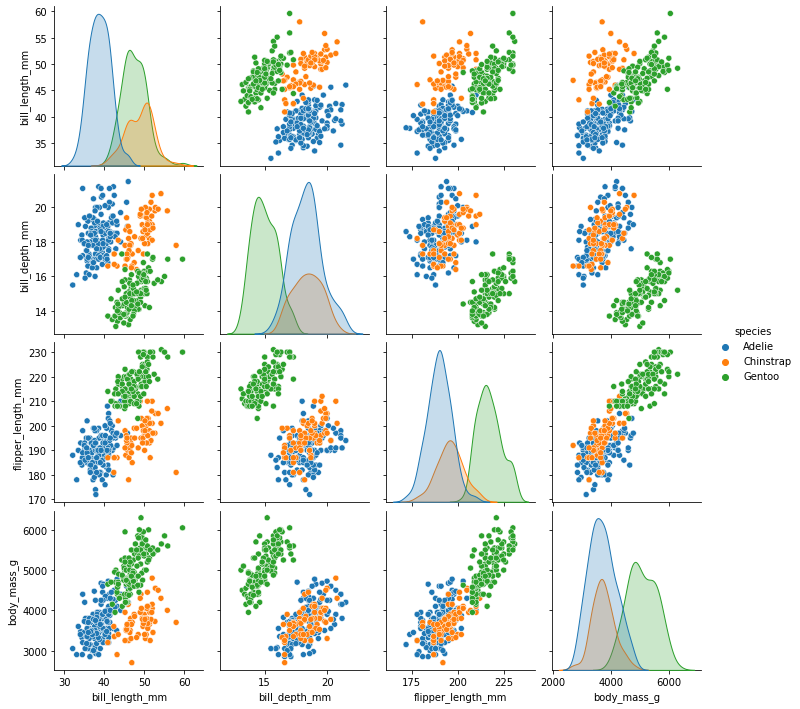

In [8]:
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

In [9]:
url = 'https://raw.githubusercontent.com/tokyo-metropolitan-gov/covid19/development/data/data.json'

In [10]:
response = requests.get(url)
response

<Response [200]>

In [11]:
response.headers

{'Connection': 'keep-alive', 'Content-Length': '29000', 'Cache-Control': 'max-age=300', 'Content-Security-Policy': "default-src 'none'; style-src 'unsafe-inline'; sandbox", 'Content-Type': 'text/plain; charset=utf-8', 'ETag': 'W/"8e11c1c1412ff7dae8395ced1ec47de7f9d2fadd48eba324319830581551cff9"', 'Strict-Transport-Security': 'max-age=31536000', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'deny', 'X-XSS-Protection': '1; mode=block', 'X-GitHub-Request-Id': '4180:6E6A:1B463E:28A990:611BF07C', 'Content-Encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Date': 'Tue, 17 Aug 2021 17:23:13 GMT', 'Via': '1.1 varnish', 'X-Served-By': 'cache-mdw17349-MDW', 'X-Cache': 'HIT', 'X-Cache-Hits': '1', 'X-Timer': 'S1629220994.868366,VS0,VE1', 'Vary': 'Authorization,Accept-Encoding', 'Access-Control-Allow-Origin': '*', 'X-Fastly-Request-ID': '1d86436d856cc1426856723cd1c58cee294a136b', 'Expires': 'Tue, 17 Aug 2021 17:28:13 GMT', 'Source-Age': '5'}

In [12]:
response.status_code

200

In [13]:
data = response.json()
data.keys()

dict_keys(['contacts', 'querents', 'patients_summary', 'inspections_summary', 'lastUpdate', 'main_summary'])

In [14]:
patients_summary = data['patients_summary']
patients_summary.keys()

dict_keys(['date', 'data'])

In [15]:
update_at = patients_summary['date']
update_at

'2021/08/17 21:00'

In [16]:
patients_summary = patients_summary['data']
patients_summary

[{'小計': 1, '日付': '2020-01-24T08:00:00.000Z'},
 {'小計': 1, '日付': '2020-01-25T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-26T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-27T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-28T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-29T08:00:00.000Z'},
 {'小計': 1, '日付': '2020-01-30T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-01-31T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-01T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-02T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-03T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-04T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-05T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-06T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-07T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-08T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-09T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-10T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-11T08:00:00.000Z'},
 {'小計': 0, '日付': '2020-02-12T08:00:00.000Z'},
 {'小計': 1, '日付': '2020-02-13T08:00:00.000Z'},
 {'小計': 2, '日付': '2020-02-14T08:00

In [17]:
df = pd.DataFrame(patients_summary)


In [18]:
# df = pd.DataFrame(patients_summary)
# df

In [19]:
df.index = pd.to_datetime(df['日付'])

In [20]:
_df = df.copy()


In [21]:
_df['date'] = _df.index
_df['cnt'] = _df['小計']


In [22]:
_df['move_ave_3'] = _df['cnt'].rolling('3D').mean()
_df['move_ave_7'] = _df['cnt'].rolling('7D').mean()
_df['move_ave_14'] = _df['cnt'].rolling('14D').mean()
_df['move_ave_21'] = _df['cnt'].rolling('21D').mean()
_df['move_ave_30'] = _df['cnt'].rolling('30D').mean()
_df['move_ave_60'] = _df['cnt'].rolling('60D').mean()
_df['move_ave_90'] = _df['cnt'].rolling('90D').mean()
_df['move_ave_120'] = _df['cnt'].rolling('120D').mean()
_df['move_ave_180'] = _df['cnt'].rolling('180D').mean()
_df['move_ave_365'] = _df['cnt'].rolling('365D').mean()


In [23]:
_df = _df.drop(['日付', '小計'], axis=1)

In [24]:
x = _df['date']
y1 = _df['cnt']

In [25]:
y2 = _df['move_ave_3']


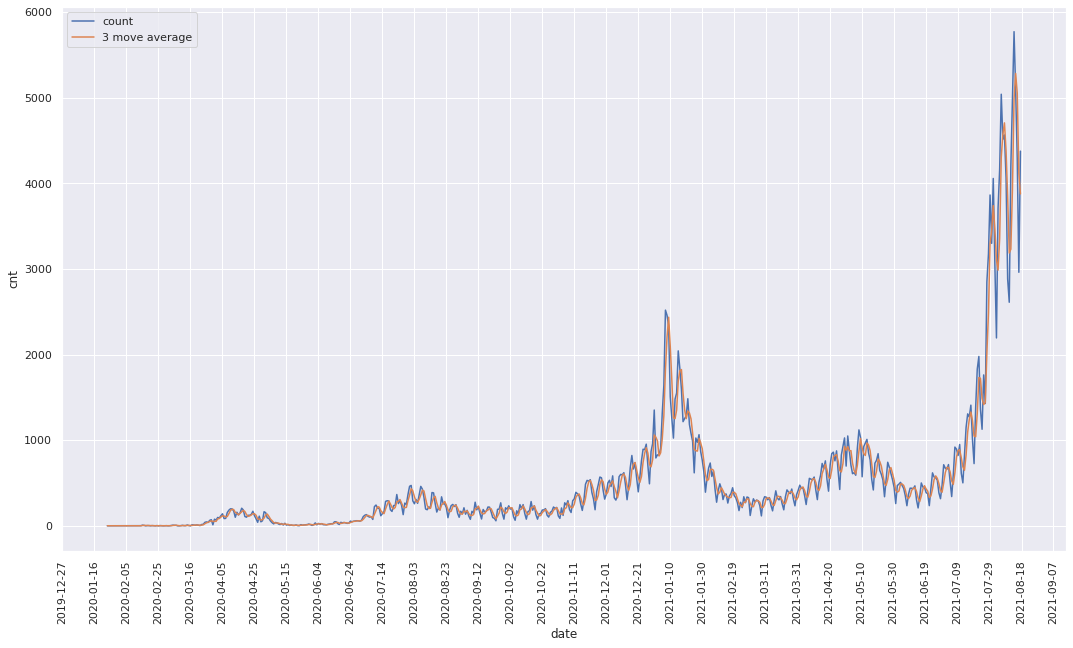

In [26]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='3 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [27]:
y2 = _df['move_ave_7']


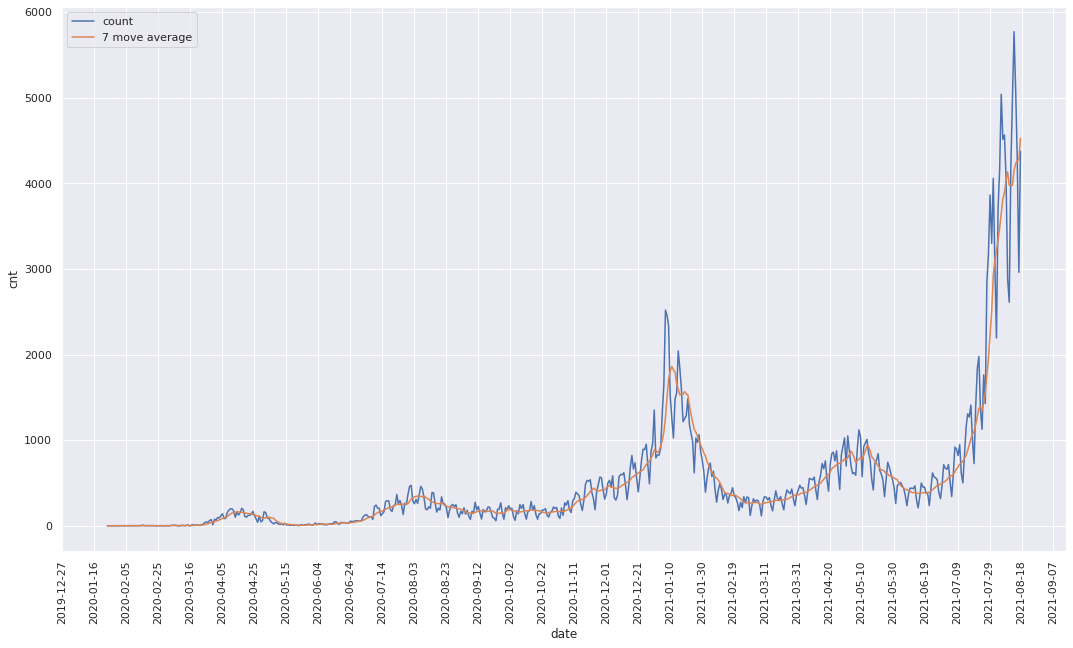

In [28]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='7 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [29]:
y2 = _df['move_ave_14']


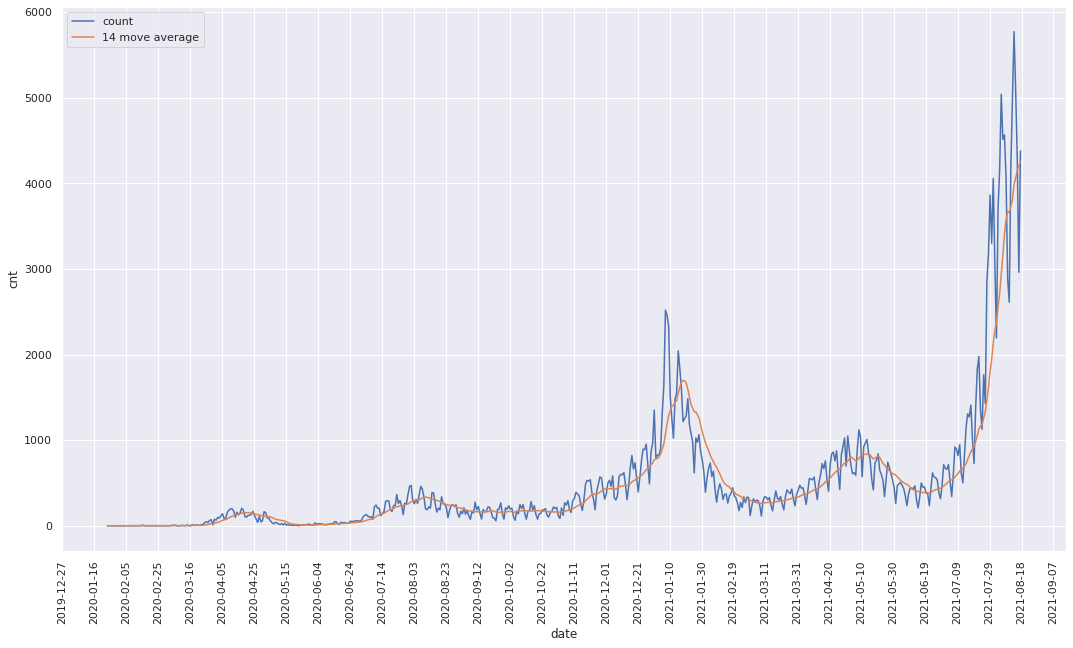

In [30]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='14 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [31]:
y2 = _df['move_ave_21']


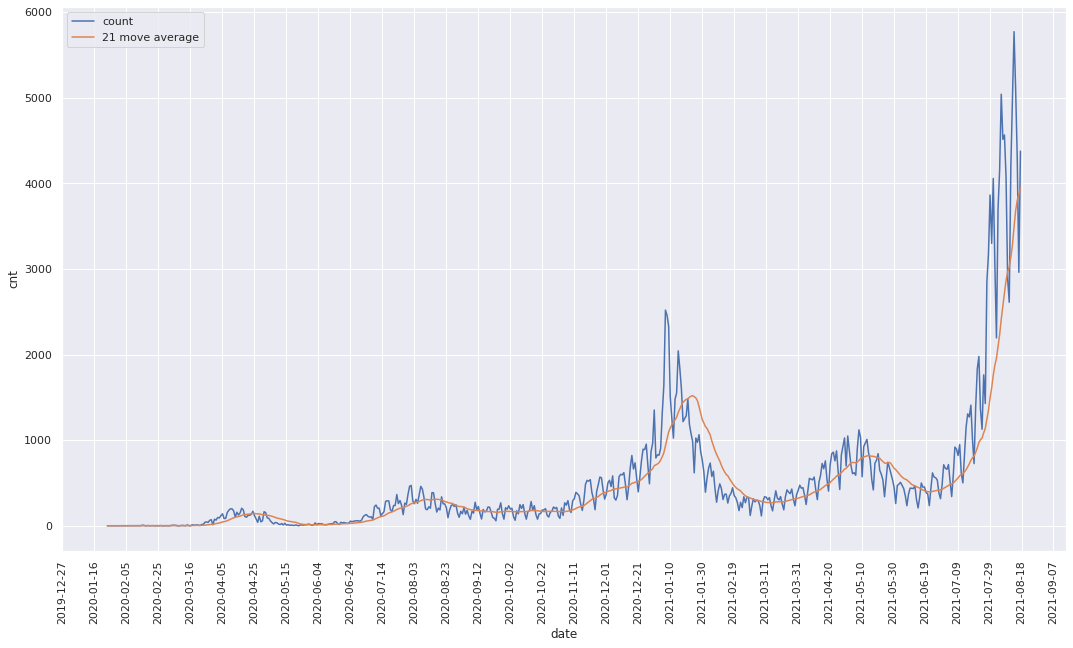

In [32]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='21 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [33]:
y2 = _df['move_ave_30']


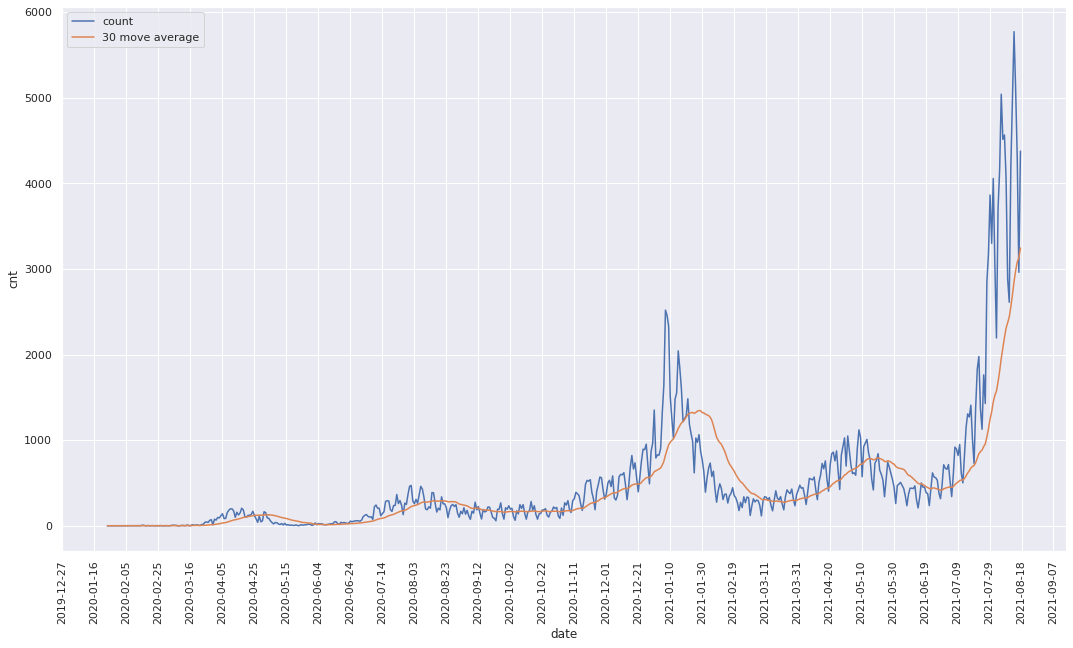

In [34]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='30 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [35]:
y2 = _df['move_ave_60']


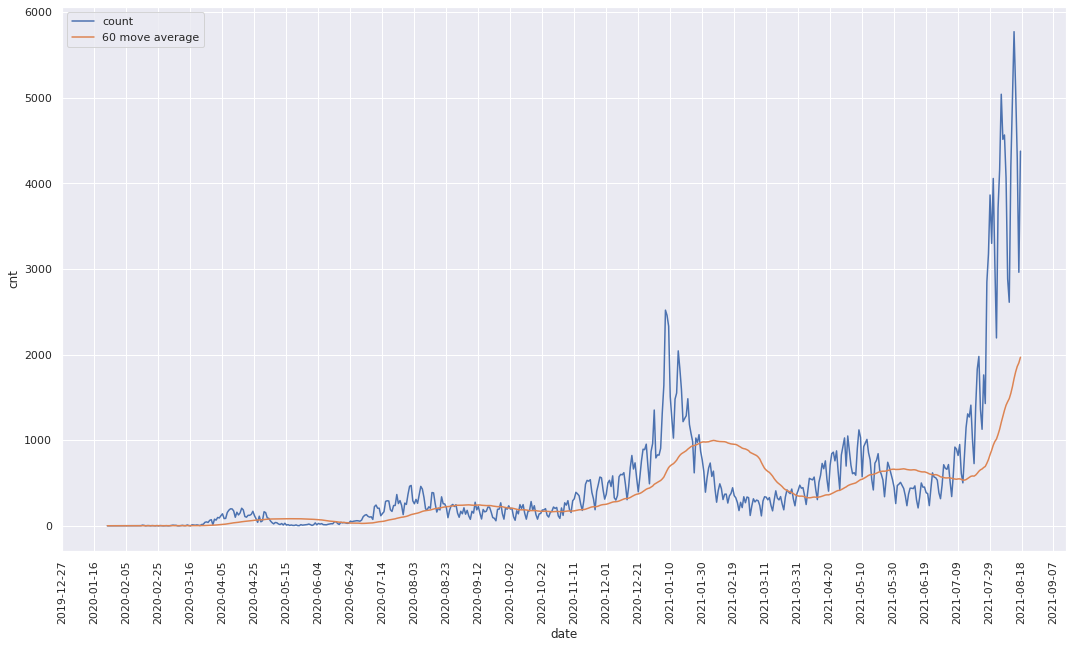

In [36]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='60 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [37]:
y2 = _df['move_ave_90']


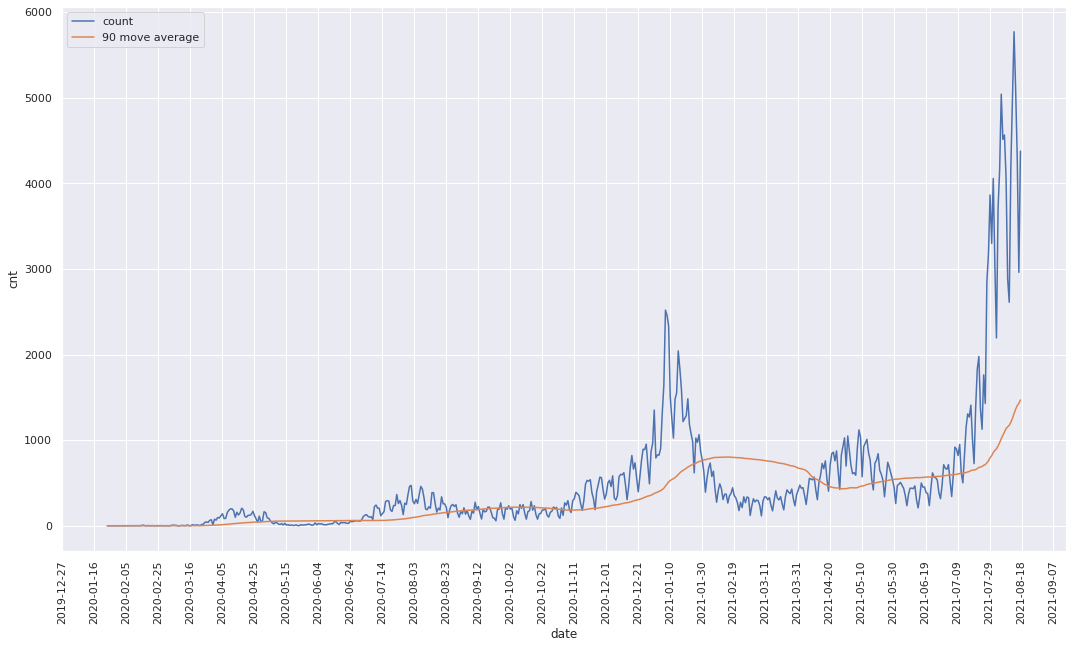

In [38]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='90 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [39]:
y2 = _df['move_ave_120']


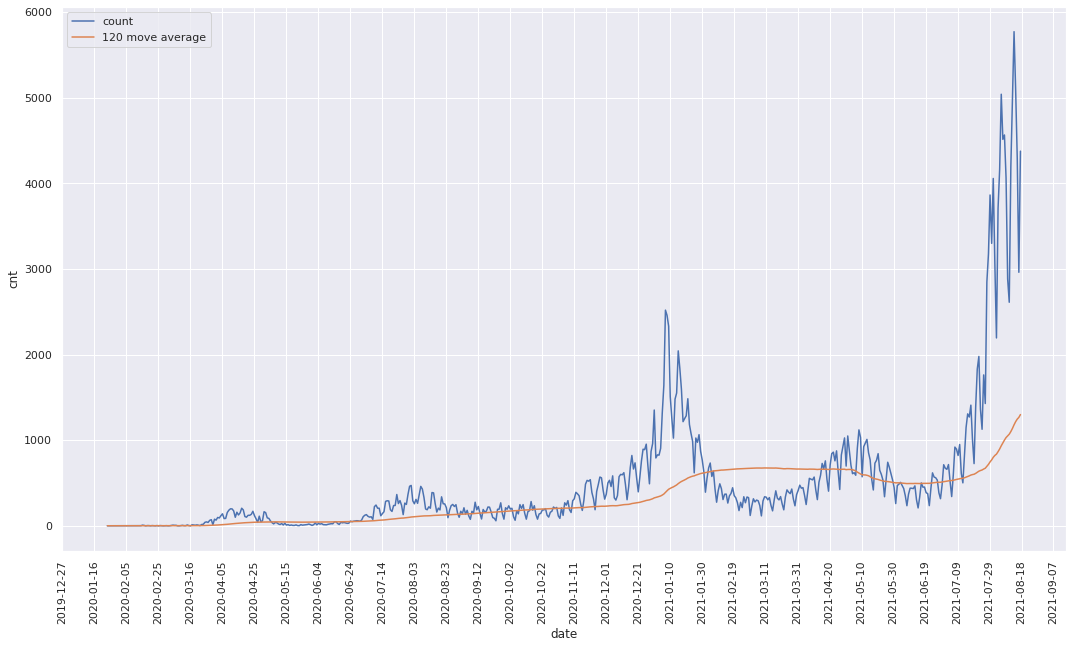

In [40]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='120 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [41]:
y2 = _df['move_ave_180']


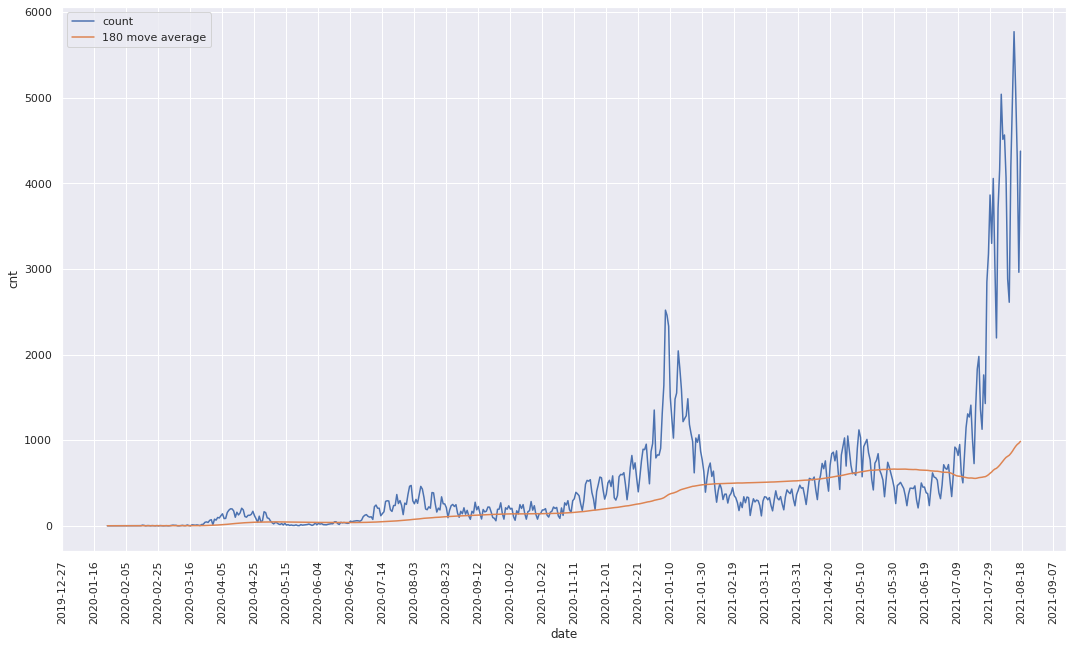

In [42]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='180 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [43]:
y2 = _df['move_ave_365']


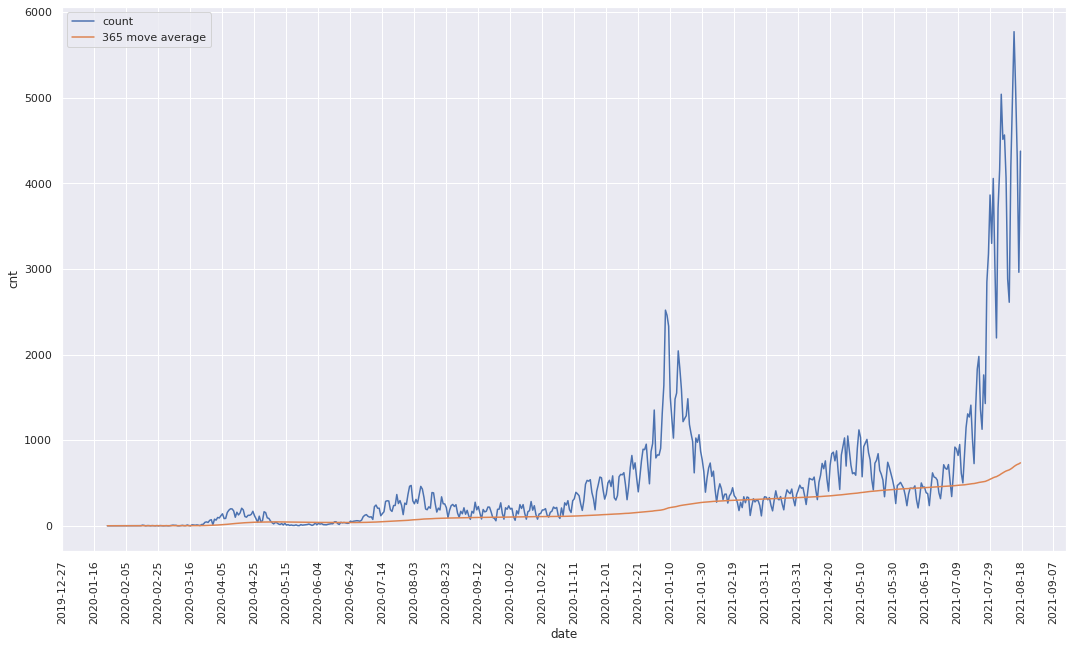

In [44]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='count')
ax.plot(x, y2, label='365 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [45]:
y1 = _df['move_ave_3']
y2 = _df['move_ave_7']
y3 = _df['move_ave_14']
y4 = _df['move_ave_21']
y5 = _df['move_ave_30']


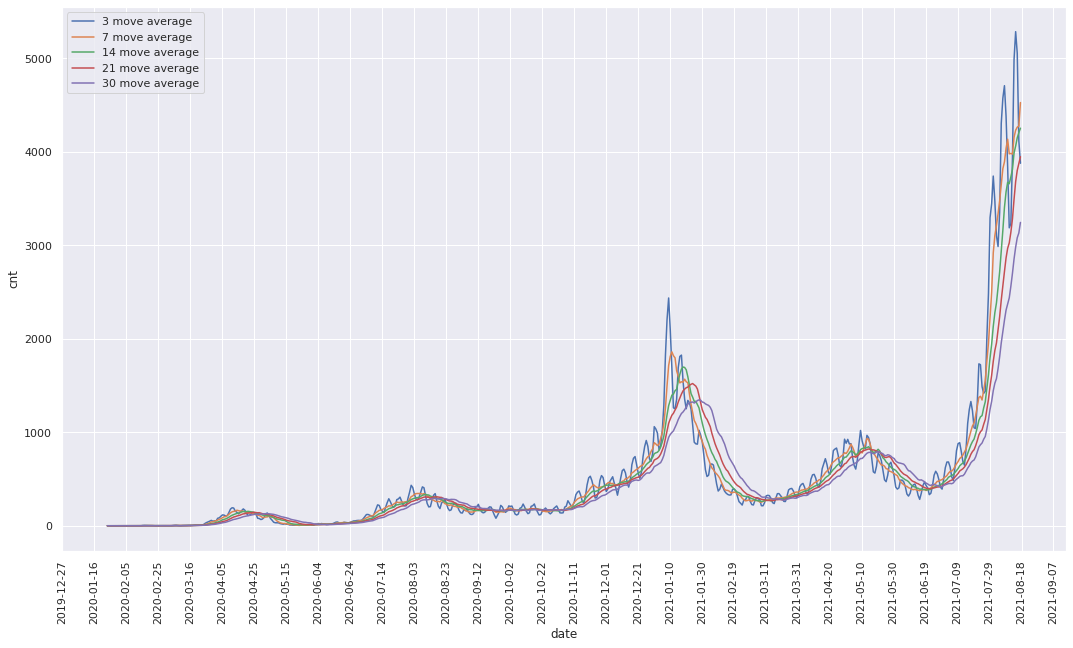

In [46]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y1, label='3 move average')
ax.plot(x, y2, label='7 move average')
ax.plot(x, y3, label='14 move average')
ax.plot(x, y4, label='21 move average')
ax.plot(x, y5, label='30 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

In [47]:
y11 = _df['move_ave_60']
y12 = _df['move_ave_90']
y13 = _df['move_ave_120']
y14 = _df['move_ave_180']
y15 = _df['move_ave_365']


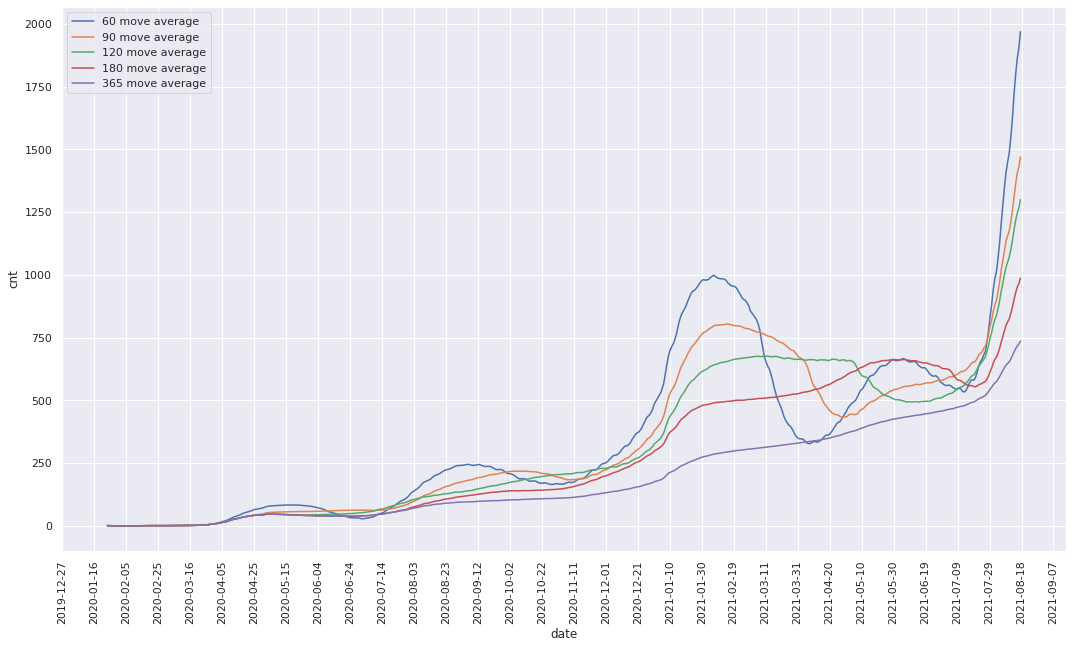

In [48]:
sns.set()
fig, ax = plt.subplots(figsize = (18,10)) 
ax.plot(x, y11, label='60 move average')
ax.plot(x, y12, label='90 move average')
ax.plot(x, y13, label='120 move average')
ax.plot(x, y14, label='180 move average')
ax.plot(x, y15, label='365 move average')
ax.set(xlabel='date',ylabel='cnt' )
ax.legend()

ax.set_xticklabels(labels=df.index, rotation=90, ha='center')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

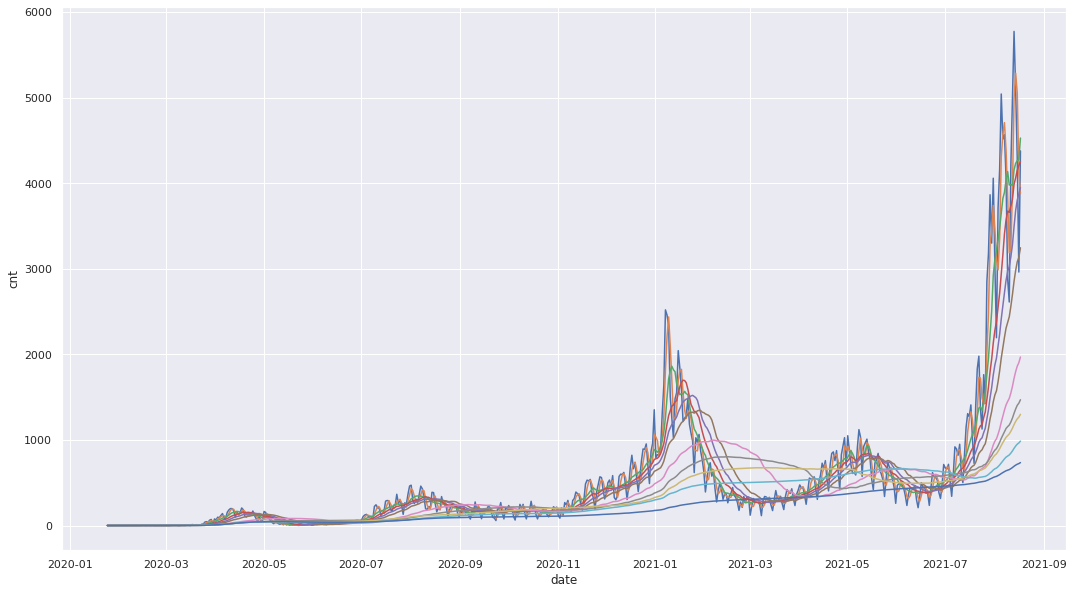

In [49]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(18,10))
sns.lineplot(x="date", y="cnt", data=_df)
sns.lineplot(x="date", y="move_ave_3", data=_df)
sns.lineplot(x="date", y="move_ave_7", data=_df)
sns.lineplot(x="date", y="move_ave_14", data=_df)
sns.lineplot(x="date", y="move_ave_21", data=_df)
sns.lineplot(x="date", y="move_ave_30", data=_df)
sns.lineplot(x="date", y="move_ave_60", data=_df)
sns.lineplot(x="date", y="move_ave_90", data=_df)
sns.lineplot(x="date", y="move_ave_120", data=_df)
sns.lineplot(x="date", y="move_ave_180", data=_df)
sns.lineplot(x="date", y="move_ave_365", data=_df)